# Scaffolding for Data Science

After setting up various data science project and tutorials, I came up with a recipe for better productivity and automation. Here below you will find a guided tour about this data science setup.

## Elements

This scaffolding works with three elements, which are co-ordinated with each other:

  - a project template 
  - a python package (datalabframework)
  - configuration files (metadata.yml)
  - continuos integration

## Principles ##

- ** Both notebooks and code are first citizens **

In the source directory `src` you will find all source code. In particular, both notebooks and code files are treated as source files. Source code is further partitioned and scaffolded in several directories to simplify and organize the data science project. Following python package conventions, the root of the project is tagged by a `__main__.py` file and directory contains the `__init__.py` code. By doing so, python and notebook files can reference each other.

Python notebooks and Python code can be mixed and matched, and are interoperable with each other. You can include function from a notebook to a python code, and you can include python files in a notebook. 

- ** Data Directories should not contain logic code **

Data can be located anywhere, on remote HDFS clusters, or Object Store Services exposed via S3 protocols etc. However, in general is a good practice to keep some (or all data, if possible) locally on the file system. 

Separating data, configuration and code is done by moving all configuration to metadata files. Metadata files make possible to define aliases for data resources, data services and spark configurations, and keeping the spark code tidy with no hardcoded parameters. 

- ** Data science should be testable ** 

Local data can be used also to validate the logic written in the data science steps and to test the data science pipeline in a single node setup, before scaling the code to larger datasets on more powerful clusters.

Moreover, it is possible to sample data during test/dev so that we can speed up the development cycle without having to run lengthy operation on large datasets.

- ** Decouple Code from Configuration **

Notebook and Code should be decoupled from both engine configurations and from data locations. All configuration is kept in `metadata.yml` yaml files. Multiple setups for test, exploration, production can be described  in the same `metadata.yml` file or in separate multiple files.

- ** Declarative Configuration **

Metadata files are responsible for the binding of data and engine configurations to the code. For instance all data in the code shouold be referenced by an alias, and storage and retrieval of data object and files should happen via a common API. The metadata yaml file, describes the providers for each data source as well as the mapping of data aliases to their corresponding data objects. 



## Project Template

The data science project is structured in a way to facilitate the deployment of the artifacts, and to switch from batch processing to live experimentation. The top level project is composed of the following items:

### Top level Structure

```
  - binder
  - ci
  - data
  - src
  Makefile
  README.md
```

The directory `binder` contains all a descriptioon of all the packages (python, apt, etc) and the pre- and post- install scripts to run to notebooks and code in the `src` directory.  The `data` directory contains sample data for the project. While the `src` directory contains all the code, assets, and documents. Finally, `ci` contains all the scrits and the configuration for continuos development, integration, and deployment. 

### Directory Structure

The data science project is structured in three group of directories

 - ETL (Extract, Transform, Load)
 - API ( Exposed services )
 - Flows ( Data Science and BI pipelines)
 - Explore ( Story telling, Data Exploration, Try outs)
 - Publish (Reference Documents, and notebooks for blogs)

Next to that we have `data` which is meant to store local data. Testing directories can be optionally added under each specific subdirectory, and the `explore` directory is for everything else :)

```
  -src
      - etl
        - extract
        - features
        - models
          - <model_name>  
            - train
            - validate
            - test
      - api

      - publish
        - reports  
        - assets  
          - imgs
          - docs
          - js
          - css

      - explore

  - data
    - datasets
      - raw
      - clean
      - ...
    - models
```

**Extract**   
All ETL related code, reusable for automation. The code in here, either notebooks or python files can run to scale by binding the code to bigger files and more powerful execution engines, if necessary. The files can be directly instantiated by a scheduling/orchestrator tools for execution and dependencies (airflow, jenkins, drone, concourse).
  
**Features**  
All feature engineering, possibly reusable across multiple ML models
  
**Models**  
Predictive models, Data Science, Machine Learning: both training, (cross-) validation, testing

**Reports**  
Articles for reading in digital form, either statically or as live notebooks.
Under Reports, the `assets` directory stored all static files such as pictures, diagrams, pdf, external docs, js libraries, css files, and so on.

**Explore**  
All free format experiments go here

**Api**  
API's can be exposed here. For instance, using the Jupyter HTTP kernel. 
... Or Flask, Or tornado. Or your fav HTTP API library.

**Data**  
Some (smaller) data goes here, however the metadata files can refer to data located elsewhere. See data providers.

### How to set it up

A template can be instantiated using the `cookiecutter` python project.

## Data Lab Framework

In [13]:
import datalabframework as dlf

### Modules: project

When the datalabframework is imported, it starts by searching for a `__main__.py` file, according to python module file naming conventions. All modules and alias paths are all relative to this project root path.

In [2]:
dlf.project.rootpath()

'/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto'

In [12]:
dlf.project.filename()

'howto.ipynb'

In [16]:
dlf.project.workdir()

'/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto'

In [17]:
dlf.project.workrun()

'default'

In [15]:
dlf.project.info()

{'workrun': 'default',
 'filename': 'howto.ipynb',
 'rootpath': '/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto',
 'workdir': '/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto'}

### Modules: Params

Configuration is declared in metadata. Metadata is accumulated starting from the rootpath, and metadata files in submodules are merged all up together.

In [6]:
metadata = dlf.params.metadata()
dlf.utils.pretty_print(metadata)

engines:
  howto_spark:
    config:
      jobname: howto-default
      master: local[1]
    context: spark
loggers: {}
providers:
  howto:
    rootpath: data
    service: fs
resources:
  .ascombe:
    format: csv
    path: datasets/ascombe.csv
    provider: howto
  .corr:
    format: csv
    path: datasets/correlation.csv
    provider: howto
run: default



In [18]:
# just the resources, some pretty printing
dlf.utils.pretty_print(metadata['resources'])

.ascombe:
  format: csv
  path: datasets/ascombe.csv
  provider: howto
.corr:
  format: csv
  path: datasets/correlation.csv
  provider: howto



Data resources are relative to the `rootpath`. Next to the resources we can declare `providers` and `engines`. More about data binding in the next section.

### Modules: Data

Data binding works with the metadata files. It's a good practice to declare the actual binding in the metadata and avoiding hardcoding the paths in the notebooks and python source files.

`dlf.data.path()` maps the alias to the fully qualified path, while the `dlf.data.uri()` provide the full absolute uri, where . denotes how deep in the directory structure the data is located.

In [19]:
dlf.data.uri('ascombe')

'.ascombe'

In [20]:
#relative to the current directory
dlf.data.path('ascombe')

'/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto/data/datasets/ascombe.csv'

In [22]:
#absolute alias from rootpath
dlf.data.path('.ascombe')

'/home/natbusa/Projects/dsp-titanic/src/publish/reports/howto/data/datasets/ascombe.csv'

### Modules: Notebook

This submodules contains a set of utilies to extract info from notebooks. In particular, how to get the notebook name and the statistics about the cells being run.

`dlf.notebook.filename()` provides the filename of the current notebook, and the path relative to the `rootpath`.   
`dlf.notebook.list_all()` lists all notebooks under the given rootpath.

In [24]:
dlf.notebook.list_all()

['howto.ipynb', 'hello.ipynb']

### Modules: Engines

This submodules will allow you to start a context, from the configuration described in the metadata. It also provide, basic load/store data functions according to the aliases defined in the configuration.

Let's start by listing the aliases and the configuration of the engines declared in `metadata.yml`.


In [25]:
# get the aliases of the engines

dlf.utils.pretty_print(metadata['engines'])

howto_spark:
  config:
    jobname: howto-default
    master: local[1]
  context: spark



__Context: Pandas__  
Let's start the engine session, by selecting a pandas context from the list.

In [27]:
engine = dlf.engines.get('pandas')

Access the context by using the context method.

In [28]:
pd = engine.context()

#print out name and version
'{}:{}'.format(pd.__name__, pd.__version__)

'pandas:0.23.4'

Let's use the context to store and load some data. First let's create a dataset.

In [29]:
raw_columns=[
[10.0,   8.04,   10.0,   9.14,   10.0,   7.46,   8.0,    6.58],
[8.0,    6.95,   8.0,    8.14,   8.0,    6.77,   8.0,    5.76],
[13.0,   7.58,   13.0,   8.74,   13.0,   12.74,  8.0,    7.71],
[9.0,    8.81,   9.0,    8.77,   9.0,    7.11,   8.0,    8.84],
[11.0,   8.33,   11.0,   9.26,   11.0,   7.81,   8.0,    8.47],
[14.0,   9.96,   14.0,   8.10,   14.0,   8.84,   8.0,    7.04],
[6.0,    7.24,   6.0,    6.13,   6.0,    6.08,   8.0,    5.25],
[4.0,    4.26,   4.0,    3.10,   4.0,    5.39,   19.0,   12.5],
[12.0,   10.84,  12.0,   9.13,   12.0,   8.15,   8.0,    5.56],
[7.0,    4.82,   7.0,    7.26,   7.0,    6.42,   8.0,    7.91],
[5.0,    5.68,   5.0,    4.74,   5.0,    5.73,   8.0,    6.89]]

n = [['I', 'II', 'III', 'IV'], ['x', 'y']]
indexes = [i+j for i in n[0] for j in n[1]]

quartet = pd.DataFrame(data=raw_columns, columns=indexes)
quartet

,Ix,Iy,IIx,IIy,IIIx,IIIy,IVx,IVy
0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


Now let's list the available aliases to store our dataset. This is available under the `data` -> `resources` section in the yaml file.

In [30]:
dlf.utils.pretty_print(metadata['resources'])

.ascombe:
  format: csv
  path: datasets/ascombe.csv
  provider: howto
.corr:
  format: csv
  path: datasets/correlation.csv
  provider: howto



The data provider `howto` is a local data file system.

In [31]:
dlf.utils.pretty_print(metadata['providers'])

howto:
  rootpath: data
  service: fs



Let's store the dataframe as csv, first using the engine help function, then directly using the pandas context. 

In [32]:
# write using the engine utility
engine.write(quartet, 'ascombe')

In [33]:
#write using the data.path utility
quartet.to_csv(dlf.data.path('ascombe'))

Reading the data back to a DataFrame. Again first using the engine `read` utility, the directly using the pandas `read_csv` method.

In [34]:
#read using the engine utility
engine.read('ascombe')

,Unnamed: 0,Ix,Iy,IIx,IIy,IIIx,IIIy,IVx,IVy
0,0,10.0,8.04,10.0,9.14,10.0,7.46,8.0,6.58
1,1,8.0,6.95,8.0,8.14,8.0,6.77,8.0,5.76
2,2,13.0,7.58,13.0,8.74,13.0,12.74,8.0,7.71
3,3,9.0,8.81,9.0,8.77,9.0,7.11,8.0,8.84
4,4,11.0,8.33,11.0,9.26,11.0,7.81,8.0,8.47
5,5,14.0,9.96,14.0,8.10,14.0,8.84,8.0,7.04
6,6,6.0,7.24,6.0,6.13,6.0,6.08,8.0,5.25
7,7,4.0,4.26,4.0,3.10,4.0,5.39,19.0,12.50
8,8,12.0,10.84,12.0,9.13,12.0,8.15,8.0,5.56
9,9,7.0,4.82,7.0,7.26,7.0,6.42,8.0,7.91


In [35]:
# read using the context
pd = engine.context()
quartet = pd.read_csv(dlf.data.path('.ascombe'))

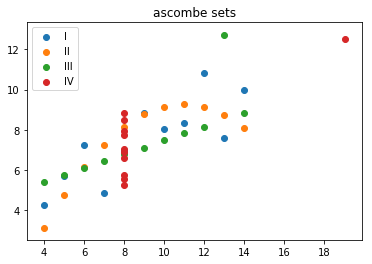

In [40]:
import matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for s in ['I', 'II', 'III', 'IV']:
    ax.scatter(quartet[s+'x'],quartet[s+'y'], label=s)
ax.set_title('ascombe sets')
ax.legend()
plt;

__Context: Spark__  
Let's start the engine session, by selecting a spark context from the list. Your can have many spark contexts declared, for instance for single node 

In [41]:
engine = dlf.engines.get('howto_spark')

You can quickly inspect the properties of the context by calling the `info()` function

In [42]:
engine.info

{'name': 'howto_spark',
 'context': 'spark',
 'config': {'jobname': 'howto-default', 'master': 'local[1]'}}

By calling the `context` method, you access the Spark SQL Context directly. The rest of your spark python code is not affected by the initialization of your session with the datalabframework.

In [43]:
spark = engine.context()

#print out name and version
'{}:{}'.format(engine.info['context'], spark.sparkSession.version)

'spark:2.3.1'

Once again, let's read the csv data again, this time using the spark context. First using the engine `write` utility, then directly using the spark context and the `dlf.data.path` function to localize our labeled dataset.

In [44]:
#read using the engine utility
df = engine.read('.ascombe')

In [45]:
#read using the spark dataframe method
df = spark.read.csv(dlf.data.path('.ascombe'), inferSchema=True, header=True)

In [46]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Ix: double (nullable = true)
 |-- Iy: double (nullable = true)
 |-- IIx: double (nullable = true)
 |-- IIy: double (nullable = true)
 |-- IIIx: double (nullable = true)
 |-- IIIy: double (nullable = true)
 |-- IVx: double (nullable = true)
 |-- IVy: double (nullable = true)



In [47]:
df.show()

+---+----+-----+----+----+----+-----+----+----+
|_c0|  Ix|   Iy| IIx| IIy|IIIx| IIIy| IVx| IVy|
+---+----+-----+----+----+----+-----+----+----+
|  0|10.0| 8.04|10.0|9.14|10.0| 7.46| 8.0|6.58|
|  1| 8.0| 6.95| 8.0|8.14| 8.0| 6.77| 8.0|5.76|
|  2|13.0| 7.58|13.0|8.74|13.0|12.74| 8.0|7.71|
|  3| 9.0| 8.81| 9.0|8.77| 9.0| 7.11| 8.0|8.84|
|  4|11.0| 8.33|11.0|9.26|11.0| 7.81| 8.0|8.47|
|  5|14.0| 9.96|14.0| 8.1|14.0| 8.84| 8.0|7.04|
|  6| 6.0| 7.24| 6.0|6.13| 6.0| 6.08| 8.0|5.25|
|  7| 4.0| 4.26| 4.0| 3.1| 4.0| 5.39|19.0|12.5|
|  8|12.0|10.84|12.0|9.13|12.0| 8.15| 8.0|5.56|
|  9| 7.0| 4.82| 7.0|7.26| 7.0| 6.42| 8.0|7.91|
| 10| 5.0| 5.68| 5.0|4.74| 5.0| 5.73| 8.0|6.89|
+---+----+-----+----+----+----+-----+----+----+



Finally, let's calculate the correlation for each set I,II, III, IV between the `x` and `y` columns and save the result on an separate dataset.

In [48]:
from pyspark.ml.feature import VectorAssembler

for s in ['I', 'II', 'III', 'IV']:
    va = VectorAssembler(inputCols=[s+'x', s+'y'], outputCol=s)
    df = va.transform(df)
    df = df.drop(s+'x', s+'y')
    
df.show()

+---+------------+-----------+------------+-----------+
|_c0|           I|         II|         III|         IV|
+---+------------+-----------+------------+-----------+
|  0| [10.0,8.04]|[10.0,9.14]| [10.0,7.46]| [8.0,6.58]|
|  1|  [8.0,6.95]| [8.0,8.14]|  [8.0,6.77]| [8.0,5.76]|
|  2| [13.0,7.58]|[13.0,8.74]|[13.0,12.74]| [8.0,7.71]|
|  3|  [9.0,8.81]| [9.0,8.77]|  [9.0,7.11]| [8.0,8.84]|
|  4| [11.0,8.33]|[11.0,9.26]| [11.0,7.81]| [8.0,8.47]|
|  5| [14.0,9.96]| [14.0,8.1]| [14.0,8.84]| [8.0,7.04]|
|  6|  [6.0,7.24]| [6.0,6.13]|  [6.0,6.08]| [8.0,5.25]|
|  7|  [4.0,4.26]|  [4.0,3.1]|  [4.0,5.39]|[19.0,12.5]|
|  8|[12.0,10.84]|[12.0,9.13]| [12.0,8.15]| [8.0,5.56]|
|  9|  [7.0,4.82]| [7.0,7.26]|  [7.0,6.42]| [8.0,7.91]|
| 10|  [5.0,5.68]| [5.0,4.74]|  [5.0,5.73]| [8.0,6.89]|
+---+------------+-----------+------------+-----------+



After assembling the dataframe into four sets of 2D vectors, let's calculate the pearson correlation for each set. In the case the the ascombe sets, all sets should have the same pearson correlation.

In [49]:
from pyspark.ml.stat import Correlation
from pyspark.sql.types import DoubleType

corr = {}
cols = ['I', 'II', 'III', 'IV']

# calculate pearson correlations
for s in cols:
    corr[s] = Correlation.corr(df, s, 'pearson').collect()[0][0][0,1].item()

# declare schema
from pyspark.sql.types import StructType, StructField, FloatType
schema = StructType([StructField(s, FloatType(), True) for s in cols])

# create output dataframe
corr_df = spark.createDataFrame(data=[corr], schema=schema)

In [50]:
import pyspark.sql.functions as f
corr_df.select([f.round(f.avg(c), 3).alias(c) for c in cols]).show()

+-----+-----+-----+-----+
|    I|   II|  III|   IV|
+-----+-----+-----+-----+
|0.816|0.816|0.816|0.817|
+-----+-----+-----+-----+



Save the results. It's a very small data frame, however Spark when saving  csv format files, assumes large data sets and partitions the files inside an object (a directory) with the name of the target file. See below:


In [51]:
engine.write(corr_df,'corr', mode='overwrite')

We read it back to chack all went fine

In [52]:
engine.read('corr').show()

+---------+---------+----------+----------+
|      _c0|      _c1|       _c2|       _c3|
+---------+---------+----------+----------+
|0.8164205|0.8162365|0.81628674|0.81652147|
+---------+---------+----------+----------+



### Modules: Export

This submodules will allow you to export cells and import them in other notebooks as python packages. Check the notebook [hello.ipynb](hello.ipynb), where you will see how to export the notebook, then follow the code here below to check it really works!


In [53]:
from hello import hi

importing Jupyter notebook from hello.ipynb


In [54]:
hi()

Hi World!
